# Parse output of `hmmsearch` with single-copy genes on genomes from WoL v2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 12,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

## Moody 2024

Load genomes from WoL v2

In [2]:
genomes = np.loadtxt(f'../markers_selection/output_data/genomes_sampled_family_10.txt', dtype = str)
genomes.shape

(1510,)

Load output from hmmsearch

In [3]:
df = pd.read_table(f'./moody_2024/wol2/hits/moody_scg_hits_wol2.txt', sep = '\s+', comment = '#',
                  header = None, 
                names = ['target', 'acession_1', 'query', 'acession_2', 'e-value_full', 'score_full', 'bias_full',
                        'e-value_domain', 'score_domain', 'bias_domain',
                        'exp', 'reg', 'clu', 'ov', 'env', 'dom', 'rep', 'inc', 'description'])
df.set_index('target', inplace = True)

In [4]:
df.shape

(122926, 18)

Filter ORFs (`target`) not in selected 1,510 genomes from WoL v2.

In [5]:
df['genome'] = df.index.map(lambda x: x.split('_')[0])

In [6]:
df['wol2'] = df['genome'].map(lambda x: 'yes' if x in genomes else 'no')

In [7]:
df = df[df['wol2'] == 'yes']

In [8]:
df.shape

(122926, 20)

Load suggested bit score values for each SCG --Only for Maartinez-Gutierrez marker gene set

In [9]:
# score_dict = {"COG0012":float(210), "COG0016":float(240), "COG0018":float(340), "COG0048":float(100), "COG0049":float(120), "COG0052":float(140), "COG0080":float(90), "COG0081":float(130), "COG0085":float(200), "COG0086":float(200), "COG0087":float(120), "COG0088":float(110), "COG0090":float(180), "COG0091":float(80), "COG0092":float(120), "COG0093":float(80), "COG0094":float(110), "COG0096":float(80), "COG0097":float(100), "COG0098":float(140), "COG0099":float(120), "COG0100":float(80), "COG0102":float(100), "COG0103":float(80), "COG0124":float(320), "COG0172":float(170), "COG0184":float(60), "COG0185":float(70), "COG0186":float(80), "COG0197":float(70), "COG0200":float(60), "COG0201":float(210), "COG0202":float(80), "COG0215":float(400), "COG0256":float(70), "COG0495":float(450), "COG0522":float(80), "COG0525":float(740), "COG0533":float(300), "COG0541":float(450), "COG0552":float(220), "COG0086":float(300)}

In [10]:
# df['significant'] = df.apply(lambda x: 'yes' if x['score_full'] >= score_dict[x['query']] else 'no', axis = 1)

In [11]:
# df = df[df['significant'] == 'yes']

In [12]:
# df.shape

Statistics

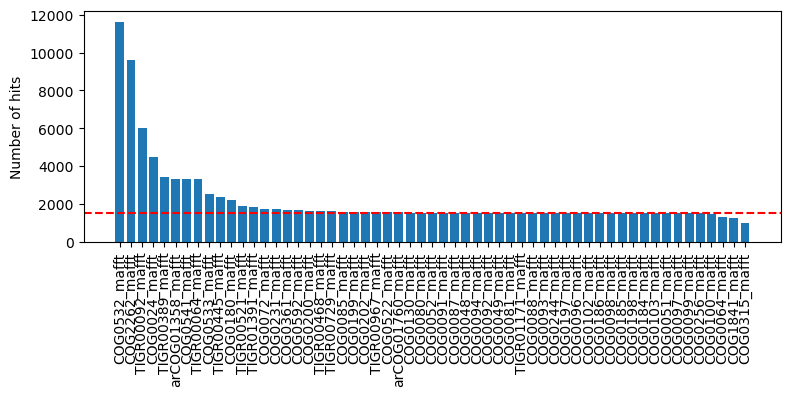

In [9]:
plt.figure(figsize = (9, 3))
datum = df['query'].value_counts()
plt.bar(datum.index, datum)
plt.xticks(rotation = 90)
plt.axhline(y = len(genomes), color = 'r', ls = 'dashed')
plt.ylabel('Number of hits')
plt.show()

For each species and SCG take only the top/best hit

In [11]:
%%time
orfs = {}
genes = df['query'].unique()
for scg in genes:
    orfs[scg] = []
    filtered_df = df[df['query'] == scg]
    grouped = filtered_df.groupby('genome')
    for genome, group in grouped:
        if not group.empty:
            top_idx = group.sort_values(by = 'score_full', ascending = False).index[0]
            orfs[scg].append(top_idx)

CPU times: user 5.99 s, sys: 48.1 ms, total: 6.04 s
Wall time: 6.05 s


Save ORFS

In [12]:
len(orfs)

57

In [13]:
for scg, ofs in orfs.items():
    with open(f'./moody_2024/wol2/orfs/{scg}.txt', 'w') as f:
        for of in ofs:
            f.write(f'{of}\n')

Calculate the number of marker genes per genome

In [14]:
markers_per_genome = {}
for scg, ofs in orfs.items():
    for of in ofs:
        genome = of.split('_')[0]
        if genome not in markers_per_genome.keys():
            markers_per_genome[genome] = 1
        else:
            markers_per_genome[genome] += 1

Exclude those genome with less than k * 0.25 marker genes

In [15]:
for genome, num_markers in markers_per_genome.items():
    if num_markers < int(57 * 0.25):
        print(genome)

No genomes to exclude

## Martinez-Gutierrez

In [16]:
genomes = np.loadtxt(f'../markers_selection/output_data/genomes_sampled_family_10.txt', dtype = str)
genomes.shape

(1510,)

Load output from HMMsearch

In [17]:
df = pd.read_table(f'./martinez_gutierrez/wol2/hits/41_scg_hits.txt', sep = '\s+', comment = '#',
                  header = None, 
                names = ['target', 'acession_1', 'query', 'acession_2', 'e-value_full', 'score_full', 'bias_full',
                        'e-value_domain', 'score_domain', 'bias_domain',
                        'exp', 'reg', 'clu', 'ov', 'env', 'dom', 'rep', 'inc', 'description'])
df.set_index('target', inplace = True)

In [18]:
df.shape

(933283, 18)

Filter ORFs (`target`) not in genomes from WoL v2.

In [19]:
df['genome'] = df.index.map(lambda x: x.split('_')[0])

In [20]:
df['wol2'] = df['genome'].map(lambda x: 'yes' if x in genomes else 'no')

In [21]:
df = df[df['wol2'] == 'yes']

In [22]:
df.shape

(92581, 20)

Load suggested bit score values for each SCG

In [23]:
score_dict = {"COG0012":float(210), "COG0016":float(240), "COG0018":float(340), "COG0048":float(100), "COG0049":float(120), "COG0052":float(140), "COG0080":float(90), "COG0081":float(130), "COG0085":float(200), "COG0086":float(200), "COG0087":float(120), "COG0088":float(110), "COG0090":float(180), "COG0091":float(80), "COG0092":float(120), "COG0093":float(80), "COG0094":float(110), "COG0096":float(80), "COG0097":float(100), "COG0098":float(140), "COG0099":float(120), "COG0100":float(80), "COG0102":float(100), "COG0103":float(80), "COG0124":float(320), "COG0172":float(170), "COG0184":float(60), "COG0185":float(70), "COG0186":float(80), "COG0197":float(70), "COG0200":float(60), "COG0201":float(210), "COG0202":float(80), "COG0215":float(400), "COG0256":float(70), "COG0495":float(450), "COG0522":float(80), "COG0525":float(740), "COG0533":float(300), "COG0541":float(450), "COG0552":float(220), "COG0086":float(300)}

Statistics

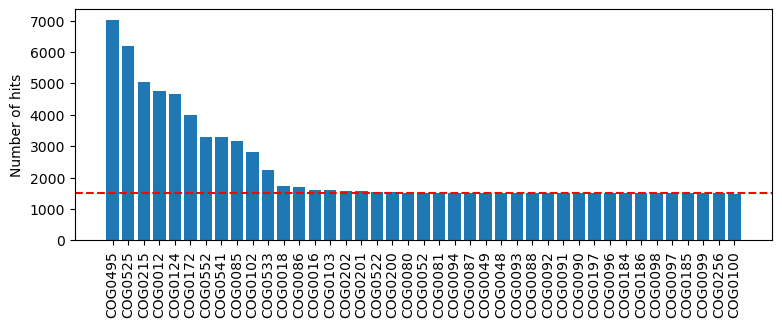

In [24]:
plt.figure(figsize = (9, 3))
datum = df['query'].value_counts()
plt.bar(datum.index, datum)
plt.xticks(rotation = 90)
plt.axhline(y = len(genomes), color = 'r', ls = 'dashed')
plt.ylabel('Number of hits')
plt.show()

For each species and SCG take only the top/best hit

In [25]:
%%time
orfs = {}
genes = df['query'].unique()
for scg in genes:
    orfs[scg] = []
    filtered_df = df[df['query'] == scg]
    grouped = filtered_df.groupby('genome')
    for genome, group in grouped:
        if not group.empty:
            top_idx = group.sort_values(by = 'score_full', ascending = False).index[0]
            orfs[scg].append(top_idx)

CPU times: user 7.94 s, sys: 46.3 ms, total: 7.98 s
Wall time: 7.99 s


In [26]:
len(orfs)

41

Calculate the number of marker genes per genome

In [27]:
markers_per_genome = {}
for scg, ofs in orfs.items():
    for of in ofs:
        genome = of.split('_')[0]
        if genome not in markers_per_genome.keys():
            markers_per_genome[genome] = 1
        else:
            markers_per_genome[genome] += 1

Exclude those genome with less than k * 0.25 marker genes

In [28]:
for genome, num_markers in markers_per_genome.items():
    if num_markers < int(len(orfs) * 0.25):
        print(genome)

No genomes to exclude